## How well do jobs and skills pay for Data Analysts in Spain?

Methodology

  1. Evaluate median salary for top 6 data jobs in Spain
  2. Find median salary per skill for Data Analysts
  3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter for the job titles and country

df_SPA = df[(df['job_country'] == 'Spain')].dropna(subset=['salary_year_avg'])


In [8]:
job_titles = df_SPA['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [11]:
df_SPA_top6 = df_SPA[df_SPA['job_title_short'].isin(job_titles)]

df_SPA_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
7170,Senior Data Engineer,Senior Software Engineer (Data Analytics),"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-24 13:27:58,False,False,Spain,year,89100.0,NaN,Aetion,"[java, python, scala, sql, r, flow]","{'other': ['flow'], 'programming': ['java', 'p..."
12335,Data Scientist,DESARROLLADOR PYTHON - PYSPARK,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-03-30 13:32:57,True,False,Spain,year,89100.0,NaN,Devoteam,"[python, sql, nosql, aws, azure, pyspark]","{'cloud': ['aws', 'azure'], 'libraries': ['pys..."
17710,Data Analyst,Master Data Analyst,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-02-03 13:44:52,True,False,Spain,year,51014.0,NaN,SGS,None,None
19856,Data Scientist,Data Scientist,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-03 13:18:20,False,False,Spain,year,90670.0,NaN,albelli-Photobox Group,"[python, r, sql, looker]","{'analyst_tools': ['looker'], 'programming': [..."
21264,Senior Data Engineer,Senior Data Engineer,Spain,via Ai-Jobs.net,Full-time,False,Spain,2023-03-06 14:05:42,False,False,Spain,year,147500.0,NaN,PayFit,"[python, sql, go, aws, redshift, snowflake, bi...","{'analyst_tools': ['looker'], 'cloud': ['aws',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772982,Machine Learning Engineer,Es- Machine Learning Con Spark,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-29 01:17:04,False,False,Spain,year,89100.0,NaN,Devoteam,"[python, scala, dynamodb, aws, databricks, spa...","{'cloud': ['aws', 'databricks'], 'databases': ..."
777078,Data Scientist,(Senior) Digital Analytics Engineer,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-25 05:17:30,False,False,Spain,year,147500.0,NaN,Netcentric,"[javascript, html, css, react, jquery, node.js...","{'libraries': ['react'], 'other': ['npm'], 'pr..."
781103,Data Analyst,Junior Data Analyst / After Sales,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-06 06:16:47,True,False,Spain,year,98500.0,NaN,Treatwell,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
781830,Data Engineer,Azure Data Architect,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-01-21 07:11:50,False,False,Spain,year,165000.0,NaN,SGS,"[sql, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."


In [18]:
job_order = df_SPA_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

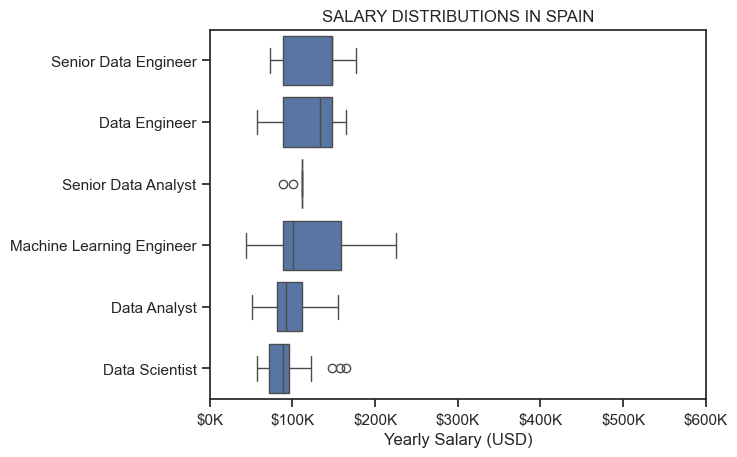

In [19]:
sns.boxplot(data=df_SPA_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('SALARY DISTRIBUTIONS IN SPAIN')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x =plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()